# Overview
In the last notebook we got the top links for a subreddit but found that they contained some duplicates.  
```
{'domains': {'docs.python.org': 9,
  'en.wikipedia.org': 8,
  'www.reddit.com': 8,
  'www.w3schools.com': 5,
  'swcarpentry.github.io': 5,
  'stackoverflow.com': 4,
  'www.python.org': 4,
  'inventwithpython.com': 4,
  'youtu.be': 3,
  'np.reddit.com': 3,
  'github.com': 3,
  'xkcd.com': 2,
  'reddit.com': 2,
  'stalas.alm.lt': 2,
  'help.kite.com': 1,
  'www.youtube.com': 1,
  'twitter.com': 1,
  '0.30000000000000004.com': 1,
  'en.m.wikipedia.org': 1,
  'asciinema.org': 1,
  'c.tenor.com': 1,
  'www.explainxkcd.com': 1,
  'old.reddit.com': 1,
  'uvmbored.com': 1,
  'mypy.readthedocs.io': 1,
  'pylint.pycqa.org': 1,
  'black.vercel.app': 1,
  'realpython.com': 1,
  'm.youtube.com': 1,
  'nostarch.com': 1,
  'www.pythonforcybersec.com': 1,
  'carpentries.org': 1,
  'software-carpentry.org': 1}}
```

In this notebook I'll go over standardizing these links and we'll run the top links analysis  on more posts.

In [3]:
import tqdm # Handy for showing progress on longer running jobs
from utils import * #Load the utilities we created in other notebooks

subreddit=reddit.subreddit("learnpython")
posts=subreddit.top("month",limit=100) # Bigger than last time

all_domains=defaultdict(int)

for post in tqdm.tqdm(posts):
    domains=get_domains(post)
    for k,v in domains.items():
        all_domains[k]+=v
all_domains=dict(sorted(all_domains.items(), key=lambda x:-x[1]))
all_domains

100it [00:46,  2.17it/s]


{'github.com': 48,
 'www.reddit.com': 47,
 'docs.python.org': 32,
 'stalas.alm.lt': 20,
 'www.python.org': 19,
 'www.youtube.com': 18,
 'en.wikipedia.org': 18,
 'np.reddit.com': 16,
 'stackoverflow.com': 14,
 'youtu.be': 12,
 'realpython.com': 12,
 'inventwithpython.com': 11,
 'www.w3schools.com': 9,
 'support.udemy.com': 8,
 'automatetheboringstuff.com': 7,
 'reddit.com': 7,
 'swcarpentry.github.io': 5,
 'www.alphavantage.co': 5,
 'medium.com': 4,
 'pastebin.com': 4,
 'youtube.com': 4,
 'en.m.wikipedia.org': 3,
 'xkcd.com': 3,
 'www.amazon.com': 3,
 'www.google.com': 3,
 'developer.mozilla.org': 3,
 'api.spotify.com': 3,
 'developer.spotify.com': 3,
 'join.slack.com': 3,
 'docs.python-requests.org': 3,
 'www.mathworks.com': 3,
 'packaging.python.org': 3,
 'www.udemy.com': 2,
 'www.geeksforgeeks.org': 2,
 'www.wolframalpha.com': 2,
 'www.explainxkcd.com': 2,
 'pep8.org': 2,
 'py.checkio.org': 2,
 'docs.github.com': 2,
 'pypi.org': 2,
 'pandas.pydata.org': 2,
 'www.kikodo.io': 2,
 'rune

In [40]:
# Run this cell if you want the exact list of urls I used in this notebook
from data import all_domains

## Approach
When solving problems like this first I like to go through by hand and look for issues. Once we've got a handle on common issues we can automate most away and do some hardcodings to fix the rest. I'm looking at you youtu.be 

Issues:  
- Trailing Parentheses
    - www.dnd5eapi.co)
- non urls
    - .py files 
        - run.py)
- www vs non www
- Subdomains
    - Not sure how I want to handle these. Sometimes a subdomain is a different site sometimes it isn't. 
    - .m (any place in url) can be handled en.m.wikipedia.org vs en.wikiepdia
    - api.
    - join.
    - docs.
    - np.


Looks pretty doable, let's go

In [41]:
def standardize_url(url):
    removable_subdomains=[
        "m",
        "join",
        "docs",
        "np",
        "www",
    ]
    for subdomain in removable_subdomains:
        url=re.sub(f"^{subdomain}\.","",url)
        url=re.sub(f"\.{subdomain}\.","",url)
        #There's probably better regex to do this but this works. Issue with splitting is I want either start of string or 
        #  a period
    

    
    misc_subs=[
        ("\).*",""),#trailing parentheses
        (".*\.py",""),
        (".*\.sh","")
    ]
    for sub_rule in misc_subs:
        url=re.sub(*sub_rule, url)
    
    #Run these last since trailing) removes a lot of gibberish and would be harder to exact match
    exact_sub_rules=[
        ("youtu.be","youtube.com"),
        ("logging\.info", "")
    ]
    for match, replace_with in exact_sub_rules:
        url=re.sub(f"^{match}$", replace_with, url)
        
    return url

for url in all_domains.keys():
    print(url)
    print(standardize_url(url))
    print()

github.com
github.com

www.reddit.com
reddit.com

docs.python.org
python.org

stalas.alm.lt
stalas.alm.lt

www.python.org
python.org

www.youtube.com
youtube.com

en.wikipedia.org
en.wikipedia.org

np.reddit.com
reddit.com

stackoverflow.com
stackoverflow.com

youtu.be
youtube.com

realpython.com
realpython.com

inventwithpython.com
inventwithpython.com

www.w3schools.com
w3schools.com

support.udemy.com
support.udemy.com

automatetheboringstuff.com
automatetheboringstuff.com

reddit.com
reddit.com

swcarpentry.github.io
swcarpentry.github.io

www.alphavantage.co
alphavantage.co

medium.com
medium.com

pastebin.com
pastebin.com

youtube.com
youtube.com

en.m.wikipedia.org
enwikipedia.org

xkcd.com
xkcd.com

www.amazon.com
amazon.com

www.google.com
google.com

developer.mozilla.org
developer.mozilla.org

api.spotify.com
api.spotify.com

developer.spotify.com
developer.spotify.com

join.slack.com
slack.com

docs.python-requests.org
python-requests.org

www.mathworks.com
mathworks.com

p

Everything looks pretty good to me now. 
- I kept en.wikipedia since I thought that could be interesting.  
- I thought about removing api. but figured I'd keep it for now since api.spotify and developer.spotify were both present but are a little different. Make these rules how you want!
  
Let's re-run.

# Rerun with cleaned urls

In [27]:
import tqdm # Handy for showing progress on longer running jobs
from utils import * #Load the utilities we created in other notebooks

subreddit=reddit.subreddit("learnpython")
N=100
posts=subreddit.top("month",limit=N) # Bigger than last time

all_domains=defaultdict(int)

for post in tqdm.tqdm(posts, total=N):#posts is a generator and doesn't tell tqdm length so we pass it through manually
    domains=get_domains(post)
    for k,v in domains.items():
        all_domains[k]+=v
all_domains=dict(sorted(all_domains.items(), key=lambda x:-x[1]))
all_domains

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:45<00:00,  1.06s/it]


{'github.com': 48,
 'www.reddit.com': 47,
 'docs.python.org': 32,
 'stalas.alm.lt': 20,
 'www.python.org': 19,
 'www.youtube.com': 18,
 'en.wikipedia.org': 18,
 'np.reddit.com': 16,
 'stackoverflow.com': 14,
 'youtu.be': 12,
 'realpython.com': 12,
 'inventwithpython.com': 11,
 'www.w3schools.com': 9,
 'support.udemy.com': 8,
 'automatetheboringstuff.com': 7,
 'reddit.com': 7,
 'swcarpentry.github.io': 5,
 'www.alphavantage.co': 5,
 'medium.com': 4,
 'pastebin.com': 4,
 'youtube.com': 4,
 'en.m.wikipedia.org': 3,
 'xkcd.com': 3,
 'www.amazon.com': 3,
 'www.google.com': 3,
 'developer.mozilla.org': 3,
 'api.spotify.com': 3,
 'developer.spotify.com': 3,
 'join.slack.com': 3,
 'docs.python-requests.org': 3,
 'www.mathworks.com': 3,
 'packaging.python.org': 3,
 'www.udemy.com': 2,
 'www.geeksforgeeks.org': 2,
 'www.wolframalpha.com': 2,
 'www.explainxkcd.com': 2,
 'pep8.org': 2,
 'py.checkio.org': 2,
 'docs.github.com': 2,
 'pypi.org': 2,
 'pandas.pydata.org': 2,
 'www.kikodo.io': 2,
 'rune

In [42]:
#Run transformation logic OUTSIDE of the slow API requests loop so you can develop FASTER
standardized_domain_counts=defaultdict(int)
for url,count in all_domains.items():
    standardized_url = standardize_url(url)
    
    #Only includes strings with values, we dropped things like .sh and .py files
    if standardized_url:
        standardized_domain_counts[standardized_url]+=count
standardized_domain_counts

defaultdict(int,
            {'github.com': 50,
             'reddit.com': 70,
             'python.org': 51,
             'stalas.alm.lt': 20,
             'youtube.com': 36,
             'en.wikipedia.org': 18,
             'stackoverflow.com': 14,
             'realpython.com': 12,
             'inventwithpython.com': 11,
             'w3schools.com': 9,
             'support.udemy.com': 8,
             'automatetheboringstuff.com': 8,
             'swcarpentry.github.io': 5,
             'alphavantage.co': 5,
             'medium.com': 4,
             'pastebin.com': 4,
             'enwikipedia.org': 3,
             'xkcd.com': 3,
             'amazon.com': 3,
             'google.com': 3,
             'developer.mozilla.org': 3,
             'api.spotify.com': 3,
             'developer.spotify.com': 3,
             'slack.com': 3,
             'python-requests.org': 3,
             'mathworks.com': 3,
             'thon.org': 6,
             'udemy.com': 2,
             'geeksfo

The top sites that aren't some "official"/widely used thing is   
1. realpython.com
2. inventwithpython.com
3. automatetheboringstuff.com
4. wcarpentry.github.io
  
Cool, we've done it. And you can too!
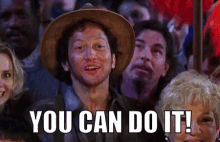


## Project Ideas
With these building blocks you can do quite a lot. The biggest thing is traversing reddit like I've shown you here. With that out of the way you can do any form of text analysis.  
  
Some ideas:  
- Improve the counts to reflect upvotes so you don't have spammers showing highly here. Learnpython was high quality but some subreddits may be worse
- Build a wallstreetbets scraper that logs sentiment 
    - Be sure to weight quality of a mention by "upvotes" and possibly the user's account age or karma
    - I'd recommend using [VADER](https://github.com/cjhutto/vaderSentiment) to start but you can go quite deep in sentiment analysis
- Create code that will notify you when a given keyword or phrase is used
    - notifying is tough but I can do a tutorial on how to do this with texting
- Compare subreddits  
    - /r/conservative and /r/liberal likely have a lot of shared sources and then some ones they link exclusively
    - Could be a cool venn diagram visual
    - Would also be neat to add in some natural language processing that understands if they are mocking something, like fox on /r/liberal or cnn on /r/conservative  
- Store the data and track over time
- On demand website
    - Let people scrape and visualize these. I'm only scratching the surface of what a company like [SparkToro](https://sparktoro.com/) does
  
Heck maybe I will do one of these projects. The comparison mode sounds most interesting to me. You can also combine these ideas to create a wicked portfolio piece.  E.g. compare subreddits, store the data, on demand website  
  
If you want to do one of these projects and want some free advice/get stuck,feel free to reach out by creating an issue in the repo, commenting on a video, or on [my blog](ergosum.co). Please whatever you do reach out to me publically so everyone can learn from your example.

# Quick visual/pandas teaser

In [48]:
import pandas as pd
df=pd.DataFrame(pd.Series(standardized_domain_counts,name="url_count"))
df

,url_count
github.com,50
reddit.com,70
python.org,51
stalas.alm.lt,20
youtube.com,36
...,...
0.0.0.0,1
hackersandslackers.com,1
jakevdp.github.io,1
sqlzoo.net,1


array([[<AxesSubplot:title={'center':'url_count'}>]], dtype=object)

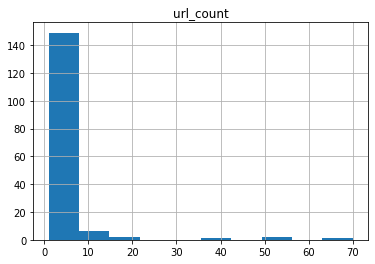

In [49]:
df.hist()

In [50]:
df.describe()

,url_count
count,161.000000
mean,3.217391
std,8.454803
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,70.000000


In [52]:
df['url_count'].quantile(.94)

8.399999999999977

Whew, not a lot of big sites in the last month. 10 is a big cutoff point. And having 11 mentions is the top 5%.   
  
Also remember, I didn't scrape every post, only the top 100 in the last month. Feel free to increase that when you run this. And you should probably adjust the counts by the number of posts/comments you parse so you have a better idea of how big 10 or 100 mentions are.
  
